In [10]:
#import dependencies
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from jupyterthemes import jtplot
#sets plot styles to match jupyter theme
jtplot.style('grade3')

# Set the folder path where the CSV files are located
folderpath = 'game_data_watched'

# Get a list of all CSV files in the folder
csv_files = [f for f in os.listdir(folderpath) if f.endswith('.csv')]

# Loop through each CSV file and read it into a DataFrame
dfs = []
for csv_file in csv_files:
    file_path = os.path.join(folderpath, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
category_df = pd.concat(dfs, ignore_index=True)
category_df.head()

,Year,Game,Watch time (mins),Stream time (mins),Peak viewers,Peak channels,Streamers,Average viewers,Average channels,Average viewer ratio,Language
0,2018,League of Legends,2678686860,30452220,108695,204,20150,5097,57,87.96,Chinese
1,2018,Hearthstone,1741260840,4863600,37559,85,4988,3313,9,358.02,Chinese
2,2018,Music,1603313160,2318040,13085,11,699,3050,4,691.67,Chinese
3,2018,PUBG: BATTLEGROUNDS,1451157480,24016320,47270,225,16890,2761,45,60.42,Chinese
4,2018,IRL,1284889440,11018040,28782,109,9692,2444,20,116.62,Chinese


In [11]:
#iolsate total watch time/language with a groupyby
language_year = category_df.groupby(['Year','Language']).sum()
#create a new df from language_year
language_year_df = pd.DataFrame(language_year).reset_index()
language_year_df.head()

,Year,Language,Watch time (mins),Stream time (mins),Peak viewers,Peak channels,Streamers,Average viewers,Average channels,Average viewer ratio
0,2018,Chinese,14522668320,176056800,1264214,3965,148184,27580,292,19019.69
1,2018,English,256978524960,6913397160,15850235,111303,11218666,488933,13106,11209.68
2,2018,Korean,29420214000,384766920,2442234,7807,303562,55927,684,17372.13
3,2018,Portuguese,20202113580,319068660,2370183,5017,528953,38393,568,23329.76
4,2019,Chinese,15923881020,216772680,1389825,5574,153572,30246,371,14933.59


C:\Users\itsy7\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


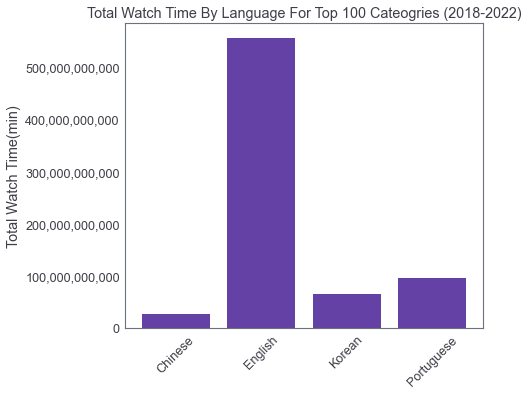

In [13]:
#bar graph for total watch time/langauge

#set axis
x_axis = language_year_df['Language']
y_axis = language_year_df['Watch time (mins)']

#plot the bar graph
fig = plt.bar(x_axis,y_axis,color = "#6441A5")

#Make it presentable
plt.xticks(rotation =45)
plt.title('Total Watch Time By Language For Top 100 Cateogries (2018-2022)')
plt.ylabel('Total Watch Time(min)')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.grid()
plt.show()

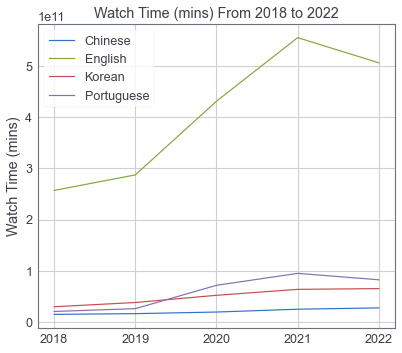

In [15]:
languages = ['Chinese','English','Korean','Portuguese']
def language_watch_trend(language_year_df, languages):
    for language in languages:
        data = language_year_df.loc[language_year_df['Language']==language]
        x_axis = data['Year']
        y_axis = data['Watch time (mins)']
        plt.plot(x_axis, y_axis, label=language)
    plt.xticks(data['Year'])
    plt.ylabel('Watch Time (mins)')
    plt.title('Watch Time (mins) From 2018 to 2022')
    plt.legend()
    plt.show()

watch = language_watch_trend(language_year_df, languages)


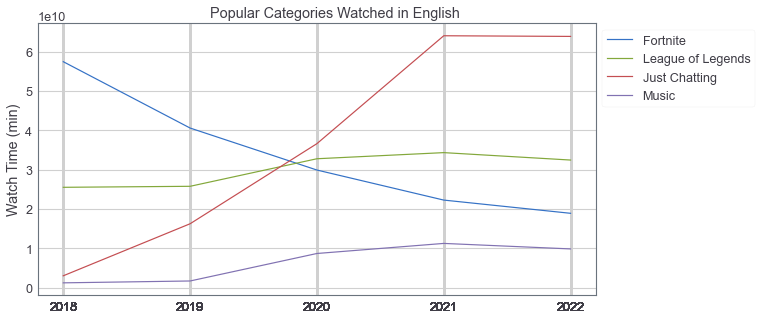

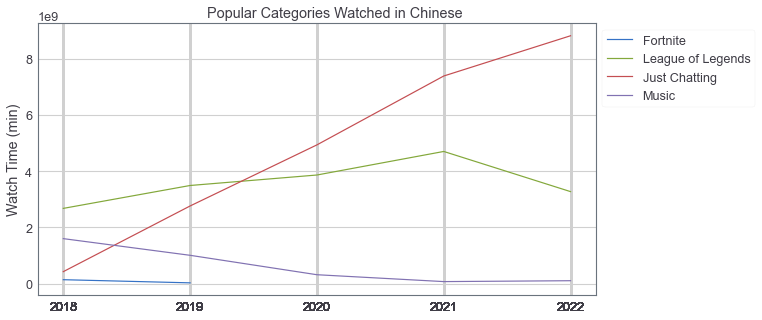

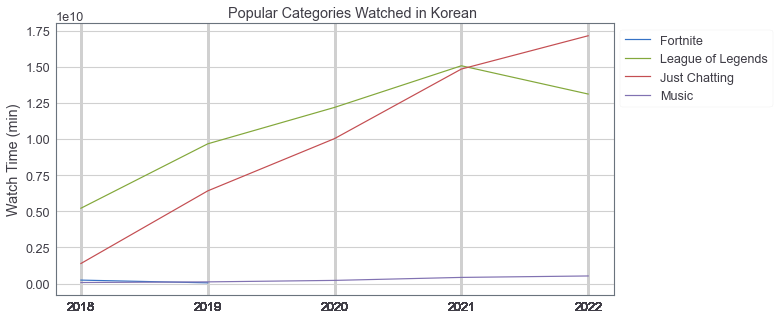

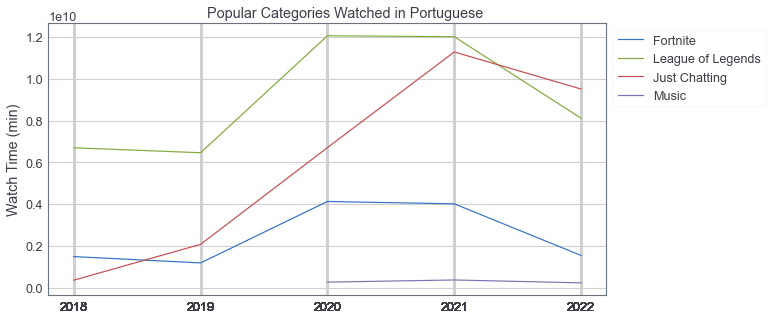

In [5]:
#List of Category to loop through
category = ['Fortnite','League of Legends','Just Chatting','Music']
#function to isolate cateogry and langauge, sorted by year
def trend_category(category_df, category, language):
    fig, ax = plt.subplots(figsize=(10,5))
    ax.set_title(f"         Popular Categories Watched in {language}")
    ax.set_ylabel("Watch Time (min)")
#loops through category
    for categor in category:
        top = (category_df[category_df["Game"] == categor]
            .sort_values(by="Year", ascending=False)
            .loc[category_df["Language"] == language])
    
        ax.plot(top["Year"], top["Watch time (mins)"], label=categor)
        ax.legend(bbox_to_anchor=(1, 1))
    plt.xticks(category_df['Year'])
    plt.show()

#Call function and create graphs
eng = trend_category(category_df, category, 'English')
cn = trend_category(category_df, category, 'Chinese')
kr = trend_category(category_df, category, 'Korean')
pr = trend_category(category_df, category, 'Portuguese')

In [6]:
#Rename this column to fit anova syntax
category_df["Watch_time"] = category_df["Watch time (mins)"]

# Performing two-way ANOVA - testing game watch time influenced by: Lang and Year
model = ols('Watch_time ~ Language + Year +\
Language:Year', data=category_df).fit()

result = sm.stats.anova_lm(model, type=2)
result

,df,sum_sq,mean_sq,F,PR(>F)
Language,3.0,5.031532e+21,1.677177e+21,99.592858,4.569546e-60
Year,1.0,2.978295e+20,2.978295e+20,17.685484,2.721556e-05
Language:Year,3.0,3.394935e+20,1.131645e+20,6.719848,1.646957e-04
Residual,1992.0,3.354595e+22,1.684034e+19,NaN,NaN


In [7]:
#create a function to loop through the languages and match categories, sort by year
category = ['Fortnite','League of Legends','Just Chatting','Music']
language = ['Chinese','English','Korean','Portuguese']

def trend_category():
    reg = pd.DataFrame()
    for cate, lang in zip(category,language):
        region = category_df.loc[category_df['Language'] == lang]
        game = category_df[category_df['Game'] == cate].sort_values(by = "Year", ascending = False)
        reg = reg.append(game)
    return reg

results = trend_category()

In [8]:
#Anova test watchtime 
results["Watch_time"] = results["Watch time (mins)"]
model3 = ols(
    'Watch_time ~ Game + Language +\
    Game:Language', data=results).fit()

sm.stats.anova_lm(model3, typ=2)

,sum_sq,df,F,PR(>F)
Game,1.935146e+21,3.0,7.904385,1.744476e-04
Language,7.339589e+21,3.0,29.979616,1.080788e-11
Game:Language,1.602114e+21,9.0,2.181355,3.708775e-02
Residual,4.569961e+21,56.0,NaN,NaN


In [9]:
#iolsate total watch time/year
year = category_df.groupby(['Year']).sum()
year_df = pd.DataFrame(year).reset_index()

viewers = int(year_df['Watch time (mins)'].sum())
streamtime = int(year_df['Stream time (mins)'].sum())

#get watchtime:streamtime ratio = average viewer ratio

ratiod = viewers/streamtime
print({ratiod})
year_df.head()

{43.38486723209477}


,Year,Watch time (mins),Stream time (mins),Peak viewers,Peak channels,Streamers,Average viewers,Average channels,Average viewer ratio,Watch_time
0,2018,321123520860,7793289540,21926866,128092,12199365,610833,14650,70931.26,321123520860
1,2019,366739783500,9072916380,21560157,143419,12311089,697627,17089,59466.23,366739783500
2,2020,573681239220,11443236300,29546738,208276,18194496,1088419,21522,48733.34,573681239220
3,2021,738725143860,13124749920,31494387,180893,18493741,1405450,24778,49794.03,738725143860
4,2022,680868397620,20364731220,32941048,310213,24983400,1295358,38558,30260.65,680868397620
